# Introduction to atmospheric transparency (deprecated)

- author Sylvie Dagoret-Campagne
- creation date : 2023/02/21
- last verification : 2024/03/22 (CCIN2P3 - kernel conda_desc_py310)

- last verification : 2024/04/06 (on my mac)
- last verification : 2024/04/08 (at usdf)

### Use libraries

- getObsAtmo : for atmosphere emulation : https://github.com/LSSTDESC/getObsAtmo/tree/main
- rubinsimphot : a simplified version of rubin_sim : https://github.com/sylvielsstfr/rubinsimphot

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.colors as colors
import matplotlib.cm as cmx
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
from matplotlib.gridspec import GridSpec
import pandas as pd

import matplotlib.ticker                         # here's where the formatter is
import os,sys
import re
import pandas as pd

plt.rcParams["figure.figsize"] = (8,6)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'


In [2]:
machine_name = os.uname().nodename
path_rubinsimphot = "repos/repos_w_2024_10/rubinsimphot/src"
if 'sdf' in machine_name:
    #machine_name_usdf = 'sdfrome001'
    print("Set environment for USDF")
    newpythonpath = os.path.join(os.getenv("HOME"),path_rubinsimphot)
    sys.path.append(newpythonpath)
elif 'dagoret-nb' in machine_name:
    print("Set environment for USDF Rubin Science Platform")
    newpythonpath = os.path.join(os.getenv("HOME"),path_rubinsimphot)
    sys.path.append(newpythonpath)    
elif 'mac' in machine_name:
    print("Be sure to run this notebook in conda environment named conda_py310")
else:
    print(f"Your current machine name is {machine_name}. Check your python environment")

Set environment for USDF Rubin Science Platform


In [3]:
from scipy import interpolate

## Imports dedicated to this work

- import the atmospheric transparency emulator (instead of using libradtran code).
- import the fit tools

- import rubin sim

### libradtran emulator

In [4]:
from importlib.metadata import version
the_ver = version('getObsAtmo')
print(f"Version of getObsAtmo : {the_ver}")

Version of getObsAtmo : 0.1.1


In [5]:
from getObsAtmo import ObsAtmo
emul = ObsAtmo()

LSST site name validated as LSST observatory


In [6]:
WL = emul.GetWL()

In [7]:
import sys
sys.path.append('../lib')
import libAtmosphericFit

LSST site name validated as LSST observatory


In [8]:
from libPhotometricCorrections import *

LSST site name validated as LSST observatory


In [9]:
from rubinsimphot.phot_utils import Bandpass, Sed
from rubinsimphot.data import get_data_dir

## Configuration

In [10]:
am0 =1.20    # airmass
pwv0 = 5.0  # Precipitable water vapor vertical column depth in mm
oz0 = 300.  # Ozone vertical column depth in Dobson Unit (DU)
tau0= 0.04 # Vertical Aerosol depth (VAOD) 
beta0 = 1.0# Aerosol Angstrom exponent

In [11]:
pc = PhotometricCorrections(am0,pwv0,oz0,tau0,beta0)

/home/d/dagoret/repos/repos_w_2024_10/rubinsimphot/src/rubinsimphot/phot_utils/bandpass.py:68: UserWarning: Wavelength sampling of 1.0 nm is > 0.2 nm, this may not work well with a Sed object. Consider resampling with resample_bandpass method.
  warnings.warn(


Text(0.5, 1.0, 'Standard atmosphere transmission')

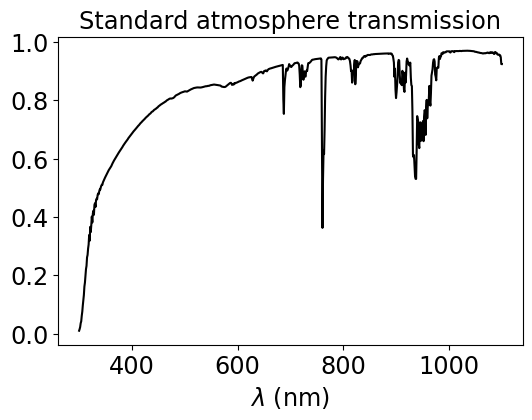

In [12]:
fig, axs = plt.subplots(1,1,figsize=(6,4))
axs.plot(pc.WL,pc.atm_std,'k-')
axs.set_xlabel("$\\lambda$ (nm)")
axs.set_title("Standard atmosphere transmission")

Text(0.5, 1.0, 'Instrument throughput')

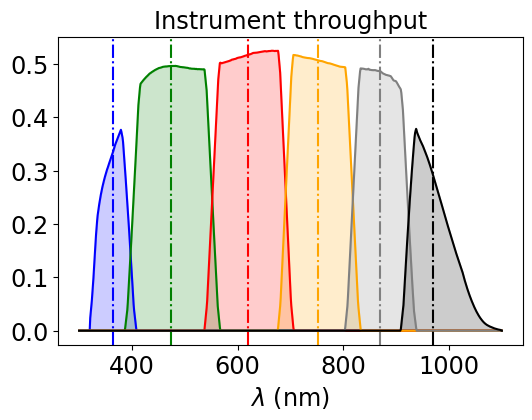

In [13]:
fig, axs = plt.subplots(1,1,figsize=(6,4))
# loop on filter
for index,f in enumerate(filter_tagnames):
    
    axs.plot(pc.bandpass_inst[f].wavelen,pc.bandpass_inst[f].sb,color=filter_color[index]) 
    axs.fill_between(pc.bandpass_inst[f].wavelen,pc.bandpass_inst[f].sb,color=filter_color[index],alpha=0.2) 
    axs.axvline(FILTERWL[index,2],color=filter_color[index],linestyle="-.")
    
axs.set_xlabel("$\\lambda$ (nm)")
axs.set_title("Instrument throughput")

Text(0.5, 1.0, 'Total filter throughput')

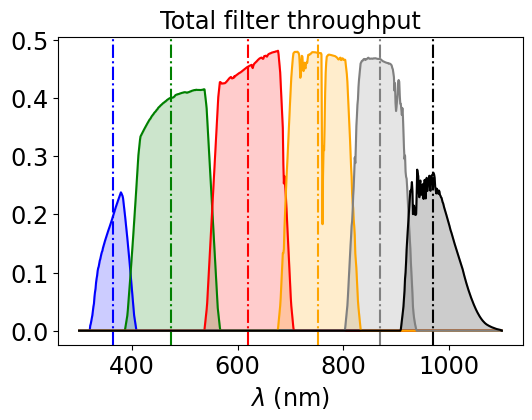

In [14]:
fig, axs = plt.subplots(1,1,figsize=(6,4))
# loop on filter
for index,f in enumerate(filter_tagnames):
    
    axs.plot(pc.bandpass_total_std[f].wavelen,pc.bandpass_total_std[f].sb,color=filter_color[index]) 
    axs.fill_between(pc.bandpass_total_std[f].wavelen,pc.bandpass_total_std[f].sb,color=filter_color[index],alpha=0.2) 
    axs.axvline(FILTERWL[index,2],color=filter_color[index],linestyle="-.")
    
axs.set_xlabel("$\\lambda$ (nm)")
axs.set_title("Total filter throughput")

Text(0.5, 1.0, 'Normalised filter total response $\\phi_b(\\lambda)$')

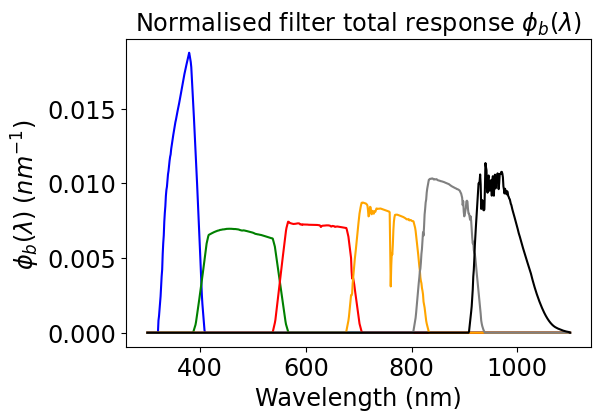

In [15]:
fig, ax = plt.subplots(1,1,figsize=(6,4))
for index,f in enumerate(filter_tagnames):
    ax.plot(pc.WL,pc.phiArray_std[index,:],'-',color=filter_color[index],label = f)
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel("$\phi_b(\lambda)\; (nm^{-1})$ ")
ax.set_title("Normalised filter total response $\phi_b(\lambda)$")

In [16]:
pc.all_II0_std

{'u': 0.03347679746900947,
 'g': 0.12252353562424145,
 'r': 0.10149514910059644,
 'i': 0.07770710336607992,
 'z': 0.05389312410967026,
 'y': 0.025940421972012996}

In [17]:
pc.all_II1_std

{'u': 2.3633003382066793,
 'g': 2.5571535134766776,
 'r': 0.9697971255128379,
 'i': 0.2891208914483352,
 'z': -0.5110258076899399,
 'y': 3.577538131072897}

In [18]:
am =2    # airmass
pwv = 5.0  # Precipitable water vapor vertical column depth in mm
oz = 300.  # Ozone vertical column depth in Dobson Unit (DU)
ncomp=1     # Number of aerosol components
tau= 0.04 # Vertical Aerosol depth (VAOD) 
beta = 1.0# Aerosol Angstrom exponent

In [19]:
pc.CalculateObs(am,pwv,oz,tau=tau,beta=beta)

Text(0.5, 1.0, 'Standard atmosphere transmission')

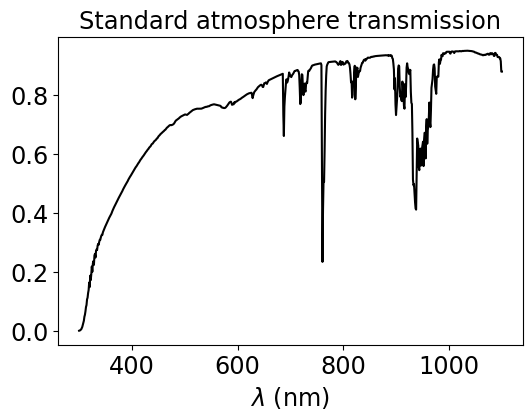

In [20]:
fig, axs = plt.subplots(1,1,figsize=(6,4))
axs.plot(pc.WL,pc.atm_nonstd,'k-')
axs.set_xlabel("$\\lambda$ (nm)")
axs.set_title("Standard atmosphere transmission")

Text(0.5, 1.0, 'Total filter throughput')

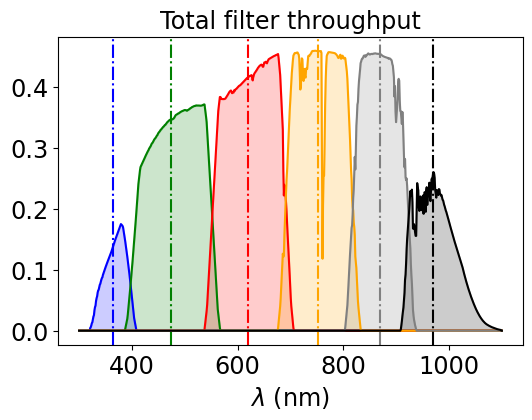

In [21]:
fig, axs = plt.subplots(1,1,figsize=(6,4))
# loop on filter
for index,f in enumerate(filter_tagnames):
    
    axs.plot(pc.bandpass_total_nonstd[f].wavelen,pc.bandpass_total_nonstd[f].sb,color=filter_color[index]) 
    axs.fill_between(pc.bandpass_total_nonstd[f].wavelen,pc.bandpass_total_nonstd[f].sb,color=filter_color[index],alpha=0.2) 
    axs.axvline(FILTERWL[index,2],color=filter_color[index],linestyle="-.")
    
axs.set_xlabel("$\\lambda$ (nm)")
axs.set_title("Total filter throughput")

Text(0.5, 1.0, 'Normalised filter total response $\\phi_b(\\lambda)$')

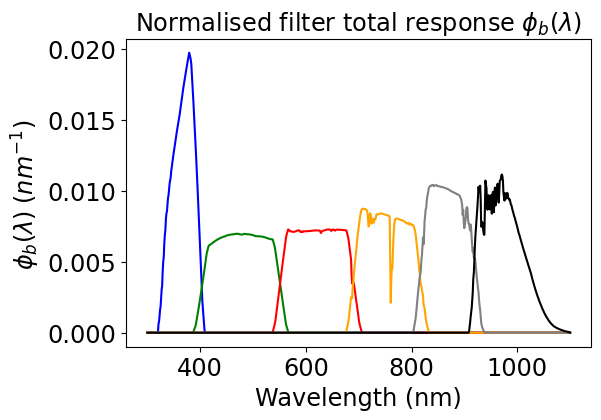

In [22]:
fig, ax = plt.subplots(1,1,figsize=(6,4))
for index,f in enumerate(filter_tagnames):
    ax.plot(pc.WL,pc.phiArray_nonstd[index,:],'-',color=filter_color[index],label = f)
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel("$\phi_b(\lambda)\; (nm^{-1})$ ")
ax.set_title("Normalised filter total response $\phi_b(\lambda)$")

In [23]:
pc.CalculateMultiObs(np.arange(1,2.5,0.2),pwv,oz,tau,beta)

In [24]:
pc.allcollperfilter

{'u': {'II0_nonstd': array([0.03664908, 0.0334768 , 0.03059154, 0.02796612, 0.02557601,
         0.02340115, 0.02141561, 0.01960745]),
  'II1_nonstd': array([1.98183577, 2.36330034, 2.73979465, 3.11132604, 3.47790839,
         3.83917517, 4.19629686, 4.54814877]),
  'II0ratio_nonstd': array([1.09476051, 1.        , 0.91381321, 0.83538807, 0.76399223,
         0.69902597, 0.63971512, 0.5857028 ]),
  'II1sub_nonstd': array([ 0.38146457,  0.        , -0.37649431, -0.74802571, -1.11460805,
         -1.47587483, -1.83299652, -2.18484843]),
  'ZPT_nonstd': array([32.12794821, 32.02965041, 31.93179398, 31.83437107, 31.73737275,
         31.64088368, 31.54461695, 31.44884366])},
 'g': {'II0_nonstd': array([0.12729937, 0.12252354, 0.11793889, 0.11353735, 0.10931104,
         0.10525594, 0.10135475, 0.09761087]),
  'II1_nonstd': array([2.13654111, 2.55715351, 2.97546015, 3.39143306, 3.80504286,
         4.21585198, 4.62507646, 5.03144902]),
  'II0ratio_nonstd': array([1.03897893, 1.        , 0.9

In [25]:
pc.allparameters

array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4])

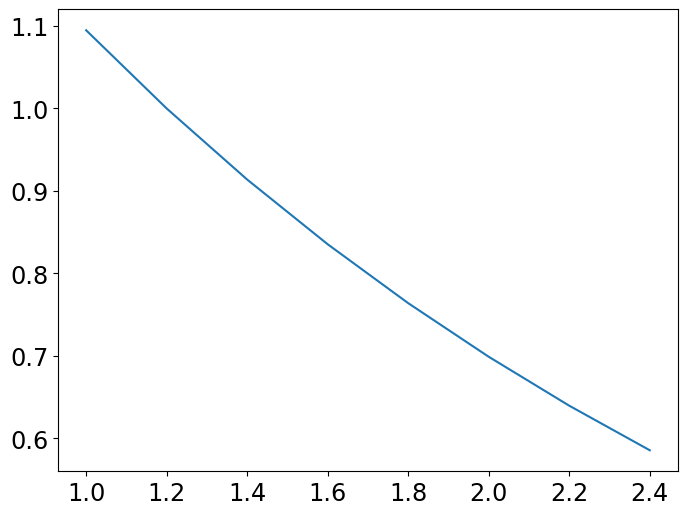

In [26]:
plt.plot(pc.allparameters,pc.allcollperfilter['u']['II0ratio_nonstd'])